In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import arch
from arch import arch_model
import data_reader as dr

In [2]:
data, source = dr.read('kospi.csv')
data.info()

Loading data from file /home/changhyun/workspace/cxk858/dataset/kospi.csv...

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2471 entries, 1 to 2483
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 2471 non-null   object 
 1   Open                 2471 non-null   float64
 2   High                 2471 non-null   float64
 3   Low                  2471 non-null   float64
 4   Close                2471 non-null   float64
 5   Adj Close            2471 non-null   float64
 6   Volume               2471 non-null   float64
 7   Daily_trading_range  2471 non-null   float64
 8   Log_Volume_change    2471 non-null   float64
 9   Daily_return         2471 non-null   float64
 10  Daily_log_return     2471 non-null   float64
 11  Past_vol22           2450 non-null   float64
 12  Past_vol10           2462 non-null   float64
 13  Target22             2450 non-null   float64
dtypes: float64

In [47]:
data.head(50)


,Date,Open,High,Low,Close,Adj Close,Volume,Daily_trading_range,Log_Volume_change,Daily_return,Daily_log_return,Past_vol22,Past_vol10,Target22
1,2010-12-02,1943.709961,1950.260010,1940.229980,1950.260010,1950.260010,439000.0,10.030030,25.790951,0.010854,0.010795,NaN,NaN,NaN
2,2010-12-03,1960.609985,1960.609985,1948.510010,1957.260010,1957.260010,438600.0,12.099975,-0.091158,0.003589,0.003583,NaN,NaN,NaN
3,2010-12-06,1961.229980,1961.469971,1946.349976,1953.640015,1953.640015,460300.0,15.119995,4.829061,-0.001850,-0.001851,NaN,NaN,NaN
4,2010-12-07,1955.630005,1964.640015,1952.560059,1962.520020,1962.520020,639200.0,12.079956,32.833894,0.004545,0.004535,NaN,NaN,NaN
5,2010-12-08,1960.300049,1970.910034,1953.969971,1955.719971,1955.719971,496400.0,16.940063,-25.283534,-0.003465,-0.003471,NaN,NaN,NaN
6,2010-12-09,1963.880005,1988.959961,1961.680054,1988.959961,1988.959961,448300.0,27.279907,-10.191940,0.016996,0.016853,NaN,NaN,NaN
7,2010-12-10,1984.109985,1991.959961,1979.729980,1986.140015,1986.140015,373900.0,12.229981,-18.147427,-0.001418,-0.001419,NaN,NaN,NaN
8,2010-12-13,1993.420044,1997.359985,1983.930054,1996.589966,1996.589966,385600.0,13.429931,3.081218,0.005261,0.005248,NaN,NaN,NaN
9,2010-12-14,2000.599976,2009.050049,1996.819946,2009.050049,2009.050049,396600.0,12.230103,2.812765,0.006241,0.006221,NaN,NaN,NaN
10,2010-12-15,2009.199951,2017.479980,2004.060059,2017.479980,2017.479980,490300.0,13.419921,21.208923,0.004196,0.004187,NaN,0.096936,NaN


In [4]:
data_cleaned = data[21:]
data_cleaned.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_trading_range,Log_Volume_change,Daily_return,Daily_log_return,Past_vol22,Past_vol10,Target22
22,2011-01-03,2063.689941,2070.090088,2054.830078,2070.080078,2070.080078,354100.0,15.260010,14.632111,0.009303,0.009260,0.088908,0.077581,0.103003
23,2011-01-04,2074.560059,2085.139893,2069.120117,2085.139893,2085.139893,415900.0,16.019776,16.086549,0.007275,0.007249,0.086037,0.075668,0.099205
24,2011-01-05,2083.100098,2087.139893,2076.919922,2082.550049,2082.550049,386100.0,10.219971,-7.434844,-0.001242,-0.001243,0.087213,0.072652,0.098520
25,2011-01-06,2094.350098,2096.649902,2066.100098,2077.610107,2077.610107,407800.0,30.549804,5.468045,-0.002372,-0.002375,0.087567,0.075905,0.098654
26,2011-01-07,2073.679932,2086.199951,2068.659912,2086.199951,2086.199951,335600.0,17.540039,-19.485688,0.004134,0.004126,0.087481,0.075547,0.098439


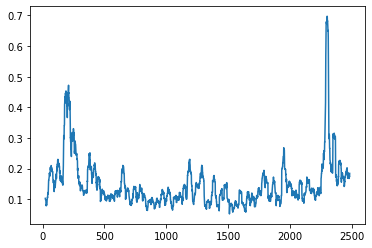

In [5]:
plt.plot(data_cleaned['Target22'])
plt.show()

In [6]:
logreturns = data_cleaned[['Daily_log_return']]
logreturns = logreturns.dropna()
testSize = int(len(logreturns)*0.8)

trainReturn = logreturns[:testSize]
testReturn = logreturns[testSize:]

trainReturn

,Daily_log_return
22,0.009260
23,0.007249
24,-0.001243
25,-0.002375
26,0.004126
...,...
1987,-0.013226
1988,0.000212
1989,0.006193
1990,-0.015325


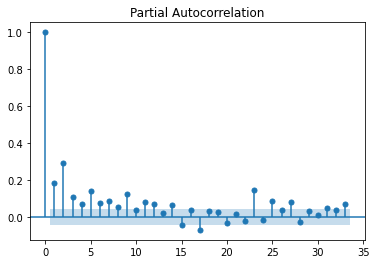

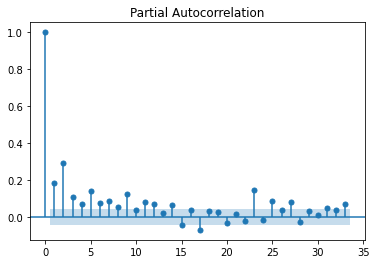

In [7]:
plot_pacf(trainReturn**2)


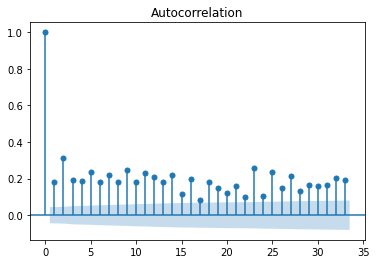

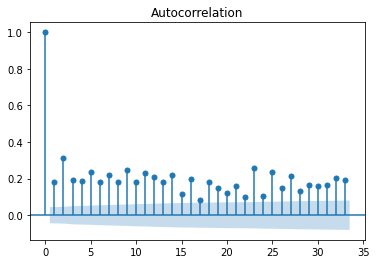

In [8]:
plot_acf(trainReturn**2)

pacf graph shows that the current KOSPI log return is related to prior time steps such as past 3 days
which are not within the significance region

To select proper GARCH model, the experiment starts with lag 3, then will choose the most
appropriate model.

In [9]:
lag1_model = arch_model(trainReturn*100, p=1, q=1,dist='skewt')
lag1_model_fit = lag1_model.fit()
lag1_model_fit.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 13921.986129750192
Iteration:      2,   Func. Count:     20,   Neg. LLF: 95596.73199998583
Iteration:      3,   Func. Count:     30,   Neg. LLF: 63720.855412221805
Iteration:      4,   Func. Count:     39,   Neg. LLF: 43553.293878982346
Iteration:      5,   Func. Count:     48,   Neg. LLF: 14391.954915257227
Iteration:      6,   Func. Count:     56,   Neg. LLF: 2399.532627795915
Iteration:      7,   Func. Count:     64,   Neg. LLF: 4130.741333431264
Iteration:      8,   Func. Count:     72,   Neg. LLF: 2400.9211112220632
Iteration:      9,   Func. Count:     80,   Neg. LLF: 4648.883066472553
Iteration:     10,   Func. Count:     88,   Neg. LLF: 2389.3237155012976
Iteration:     11,   Func. Count:     96,   Neg. LLF: 2388.8313736619752
Iteration:     12,   Func. Count:    103,   Neg. LLF: 2388.826203580676
Iteration:     13,   Func. Count:    110,   Neg. LLF: 2388.8256571763322
Iteration:     14,   Func. Count:    117,   Neg. LLF: 23

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Constant Mean - GARCH Model Results                           
=========================================================================================
Dep. Variable:                  Daily_log_return   R-squared:                      -0.000
Mean Model:                        Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                                 GARCH   Log-Likelihood:               -2388.83
Distribution:      Standardized Skew Student's t   AIC:                           4789.65
Method:                       Maximum Likelihood   BIC:                           4823.13
                                                   No. Observations:                 1960
Date:                           Tue, Mar 23 2021   Df Residuals:                     1954
Time:                                   12:41:31   Df Model:                            6
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0130  1.747e-02      0.742      0.458 [-2.127e-02,4.722e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0152  6.782e-03      2.243  2.492e-02 [1.917e-03,2.850e-02]
alpha[1]       0.0705  1.741e-02      4.048  5.162e-05   [3.636e-02,  0.105]
beta[1]        0.9118  2.288e-02     39.850      0.000     [  0.867,  0.957]
                                Distribution                               
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
nu             6.5122      0.906      7.192  6.398e-13    [  4.737,  8.287]
lambda        -0.0984  2.947e-02     -3.339  8.394e-04 [ -0.156,-4.065e-02]
===========================================================================

Covariance estimator: robust
"""

In [10]:
lag2_model = arch_model(trainReturn*100, p=2, q=2, dist='skewt')
lag2_model_fit = lag2_model.fit()
lag2_model_fit.summary()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 119737.52657835037
Iteration:      2,   Func. Count:     23,   Neg. LLF: 257854.26181373454
Iteration:      3,   Func. Count:     34,   Neg. LLF: 34423.14026890522
Iteration:      4,   Func. Count:     45,   Neg. LLF: 69588.52502156905
Iteration:      5,   Func. Count:     55,   Neg. LLF: 4249.848945370896
Iteration:      6,   Func. Count:     65,   Neg. LLF: 2452.5205069675094
Iteration:      7,   Func. Count:     75,   Neg. LLF: 2437.362838572859
Iteration:      8,   Func. Count:     85,   Neg. LLF: 2467.3303679053715
Iteration:      9,   Func. Count:     95,   Neg. LLF: 2391.4984481084343
Iteration:     10,   Func. Count:    105,   Neg. LLF: 4163.152712856669
Iteration:     11,   Func. Count:    115,   Neg. LLF: 2398.082125948207
Iteration:     12,   Func. Count:    126,   Neg. LLF: 2386.656020600012
Iteration:     13,   Func. Count:    135,   Neg. LLF: 2387.1295765254267
Iteration:     14,   Func. Count:    145,   Neg. LLF: 2386

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Constant Mean - GARCH Model Results                           
=========================================================================================
Dep. Variable:                  Daily_log_return   R-squared:                      -0.000
Mean Model:                        Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                                 GARCH   Log-Likelihood:               -2386.64
Distribution:      Standardized Skew Student's t   AIC:                           4789.29
Method:                       Maximum Likelihood   BIC:                           4833.93
                                                   No. Observations:                 1960
Date:                           Tue, Mar 23 2021   Df Residuals:                     1952
Time:                                   12:41:32   Df Model:                            8
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0107  1.744e-02      0.611      0.541 [-2.352e-02,4.485e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0275  1.277e-02      2.156  3.111e-02  [2.499e-03,5.255e-02]
alpha[1]       0.0294  2.111e-02      1.392      0.164 [-1.199e-02,7.074e-02]
alpha[2]       0.0903  3.065e-02      2.945  3.226e-03    [3.020e-02,  0.150]
beta[1]        0.4028      0.152      2.647  8.115e-03      [  0.105,  0.701]
beta[2]        0.4455      0.146      3.056  2.243e-03      [  0.160,  0.731]
                                Distribution                               
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
nu             6.5892      0.922      7.146  8.948e-13    [  4.782,  8.397]
lambda        -0.1041  2.979e-02     -3.493  4.770e-04 [ -0.162,-4.568e-02]
===========================================================================

Covariance estimator: robust
"""

In [11]:
lag3_model = arch_model(trainReturn*100, p=3, q=3, dist='skewt')
lag3_model_fit = lag3_model.fit()
lag3_model_fit.summary()

Iteration:      1,   Func. Count:     12,   Neg. LLF: 142981.35276001532
Iteration:      2,   Func. Count:     27,   Neg. LLF: 228592.77500148513
Iteration:      3,   Func. Count:     40,   Neg. LLF: 66841.46530809035
Iteration:      4,   Func. Count:     52,   Neg. LLF: 12723.204286164826
Iteration:      5,   Func. Count:     65,   Neg. LLF: 8630.556630596893
Iteration:      6,   Func. Count:     78,   Neg. LLF: 2411.331871547176
Iteration:      7,   Func. Count:     90,   Neg. LLF: 2466.9441952998777
Iteration:      8,   Func. Count:    103,   Neg. LLF: 4338.304045662045
Iteration:      9,   Func. Count:    115,   Neg. LLF: 2411.5791871487127
Iteration:     10,   Func. Count:    127,   Neg. LLF: 2394.7844588560183
Iteration:     11,   Func. Count:    139,   Neg. LLF: 2383.451754855706
Iteration:     12,   Func. Count:    150,   Neg. LLF: 2383.363033736172
Iteration:     13,   Func. Count:    161,   Neg. LLF: 2383.357461026292
Iteration:     14,   Func. Count:    172,   Neg. LLF: 2383

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Constant Mean - GARCH Model Results                           
=========================================================================================
Dep. Variable:                  Daily_log_return   R-squared:                      -0.000
Mean Model:                        Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                                 GARCH   Log-Likelihood:               -2383.36
Distribution:      Standardized Skew Student's t   AIC:                           4786.71
Method:                       Maximum Likelihood   BIC:                           4842.52
                                                   No. Observations:                 1960
Date:                           Tue, Mar 23 2021   Df Residuals:                     1950
Time:                                   12:41:32   Df Model:                           10
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         4.9981e-03  1.770e-02      0.282      0.778 [-2.970e-02,3.969e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0351  2.072e-02      1.693  9.047e-02 [-5.532e-03,7.567e-02]
alpha[1]       0.0296  2.407e-02      1.228      0.219 [-1.762e-02,7.675e-02]
alpha[2]       0.1306  3.507e-02      3.724  1.965e-04    [6.186e-02,  0.199]
alpha[3]   1.0790e-13  5.748e-02  1.877e-12      1.000      [ -0.113,  0.113]
beta[1]        0.2295      0.353      0.651      0.515      [ -0.462,  0.921]
beta[2]        0.0000      0.392      0.000      1.000      [ -0.768,  0.768]
beta[3]        0.5696      0.149      3.820  1.334e-04      [  0.277,  0.862]
                                Distribution                               
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
nu             6.6878      0.966      6.924  4.377e-12    [  4.795,  8.581]
lambda        -0.1137  3.020e-02     -3.763  1.676e-04 [ -0.173,-5.447e-02]
===========================================================================

Covariance estimator: robust
"""

In [12]:
egm_lag1 = arch_model(trainReturn*100, p=1, q=1, vol='egarch',dist='skewt')
egm_lag1_fit = egm_lag1.fit()
egm_lag1_fit.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 163924.8226483941
Iteration:      2,   Func. Count:     19,   Neg. LLF: 96953.03997290097
Iteration:      3,   Func. Count:     30,   Neg. LLF: 148477.22474188783
Iteration:      4,   Func. Count:     42,   Neg. LLF: 32819.427755803874
Iteration:      5,   Func. Count:     50,   Neg. LLF: 2399.0126118712274
Iteration:      6,   Func. Count:     58,   Neg. LLF: 4234.116850946744
Iteration:      7,   Func. Count:     66,   Neg. LLF: 2397.2722220669516
Iteration:      8,   Func. Count:     74,   Neg. LLF: 2426.071021424754
Iteration:      9,   Func. Count:     82,   Neg. LLF: 2390.087838080177
Iteration:     10,   Func. Count:     89,   Neg. LLF: 2390.081054001701
Iteration:     11,   Func. Count:     96,   Neg. LLF: 2390.080692974208
Iteration:     12,   Func. Count:    103,   Neg. LLF: 2390.080685154777
Iteration:     13,   Func. Count:    109,   Neg. LLF: 2390.0806851548355
Optimization terminated successfully    (Exit mode 0)
     

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Constant Mean - EGARCH Model Results                          
=========================================================================================
Dep. Variable:                  Daily_log_return   R-squared:                      -0.000
Mean Model:                        Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                                EGARCH   Log-Likelihood:               -2390.08
Distribution:      Standardized Skew Student's t   AIC:                           4792.16
Method:                       Maximum Likelihood   BIC:                           4825.65
                                                   No. Observations:                 1960
Date:                           Tue, Mar 23 2021   Df Residuals:                     1954
Time:                                   12:41:34   Df Model:                            6
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0140  1.748e-02      0.803      0.422 [-2.024e-02,4.830e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      2.5709e-03  3.409e-03      0.754      0.451 [-4.110e-03,9.252e-03]
alpha[1]       0.1406  2.940e-02      4.781  1.740e-06    [8.294e-02,  0.198]
beta[1]        0.9864  6.244e-03    157.976      0.000      [  0.974,  0.999]
                                Distribution                               
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
nu             6.3905      0.866      7.378  1.613e-13    [  4.693,  8.088]
lambda        -0.0941  2.924e-02     -3.220  1.284e-03 [ -0.151,-3.683e-02]
===========================================================================

Covariance estimator: robust
"""

In [13]:
egm_lag2 = arch_model(trainReturn*100, p=2, q=2, vol='egarch',dist='skewt')
egm_lag2_fit = egm_lag2.fit()
egm_lag2_fit.summary()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 73991.97514989812
Iteration:      2,   Func. Count:     23,   Neg. LLF: 68140.41054007795
Iteration:      3,   Func. Count:     36,   Neg. LLF: 97646.79341709183
Iteration:      4,   Func. Count:     49,   Neg. LLF: 182083.72125171527
Iteration:      5,   Func. Count:     61,   Neg. LLF: 39454.63214243667
Iteration:      6,   Func. Count:     72,   Neg. LLF: 3069.021410010081
Iteration:      7,   Func. Count:     82,   Neg. LLF: 2399.575568202821
Iteration:      8,   Func. Count:     92,   Neg. LLF: 2404.5301566882654
Iteration:      9,   Func. Count:    102,   Neg. LLF: 4269.877140820981
Iteration:     10,   Func. Count:    112,   Neg. LLF: 2396.860641231823
Iteration:     11,   Func. Count:    122,   Neg. LLF: 2387.437372137004
Iteration:     12,   Func. Count:    131,   Neg. LLF: 2387.403267318098
Iteration:     13,   Func. Count:    140,   Neg. LLF: 2387.4011960835105
Iteration:     14,   Func. Count:    149,   Neg. LLF: 2387.40

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Constant Mean - EGARCH Model Results                          
=========================================================================================
Dep. Variable:                  Daily_log_return   R-squared:                      -0.000
Mean Model:                        Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                                EGARCH   Log-Likelihood:               -2387.40
Distribution:      Standardized Skew Student's t   AIC:                           4790.80
Method:                       Maximum Likelihood   BIC:                           4835.45
                                                   No. Observations:                 1960
Date:                           Tue, Mar 23 2021   Df Residuals:                     1952
Time:                                   12:41:35   Df Model:                            8
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0115  1.749e-02      0.660      0.509 [-2.273e-02,4.582e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      3.4462e-03  5.544e-03      0.622      0.534 [-7.421e-03,1.431e-02]
alpha[1]       0.0374  5.315e-02      0.704      0.481   [-6.674e-02,  0.142]
alpha[2]       0.1890  5.613e-02      3.368  7.566e-04    [7.904e-02,  0.299]
beta[1]        0.4530      0.144      3.146  1.656e-03      [  0.171,  0.735]
beta[2]        0.5238      0.143      3.660  2.519e-04      [  0.243,  0.804]
                                Distribution                               
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
nu             6.4822      0.889      7.292  3.043e-13    [  4.740,  8.224]
lambda        -0.1006  2.964e-02     -3.394  6.890e-04 [ -0.159,-4.250e-02]
===========================================================================

Covariance estimator: robust
"""

In [14]:
egm_lag3 = arch_model(trainReturn*100, p=3, q=3, vol='egarch',dist='skewt')
egm_lag3_fit = egm_lag3.fit()
egm_lag3_fit.summary()

Iteration:      1,   Func. Count:     12,   Neg. LLF: 49980.85619283987
Iteration:      2,   Func. Count:     27,   Neg. LLF: 122447.0266383619
Iteration:      3,   Func. Count:     42,   Neg. LLF: 71168.57910815929
Iteration:      4,   Func. Count:     57,   Neg. LLF: 29883.99697527544
Iteration:      5,   Func. Count:     71,   Neg. LLF: 37502.20581231611
Iteration:      6,   Func. Count:     84,   Neg. LLF: 201276.22030263074
Iteration:      7,   Func. Count:     97,   Neg. LLF: 10733.928629047892
Iteration:      8,   Func. Count:    109,   Neg. LLF: 16691.24921055267
Iteration:      9,   Func. Count:    121,   Neg. LLF: 2392.093719084868
Iteration:     10,   Func. Count:    133,   Neg. LLF: 2681.356927445216
Iteration:     11,   Func. Count:    145,   Neg. LLF: 2393.1942952627187
Iteration:     12,   Func. Count:    157,   Neg. LLF: 2393.9789319928186
Iteration:     13,   Func. Count:    169,   Neg. LLF: 2384.0468908371804
Iteration:     14,   Func. Count:    180,   Neg. LLF: 2384.

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Constant Mean - EGARCH Model Results                          
=========================================================================================
Dep. Variable:                  Daily_log_return   R-squared:                      -0.000
Mean Model:                        Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                                EGARCH   Log-Likelihood:               -2383.89
Distribution:      Standardized Skew Student's t   AIC:                           4787.78
Method:                       Maximum Likelihood   BIC:                           4843.59
                                                   No. Observations:                 1960
Date:                           Tue, Mar 23 2021   Df Residuals:                     1950
Time:                                   12:41:35   Df Model:                           10
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         5.8960e-03  1.789e-02      0.330      0.742 [-2.916e-02,4.095e-02]
                               Volatility Model                               
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
omega       5.3910e-03  7.717e-03      0.699      0.485 [-9.734e-03,2.052e-02]
alpha[1]        0.0626  4.992e-02      1.254      0.210   [-3.525e-02,  0.160]
alpha[2]        0.2544  5.132e-02      4.957  7.144e-07      [  0.154,  0.355]
alpha[3]   -3.7140e-03  9.581e-02 -3.876e-02      0.969      [ -0.192,  0.184]
beta[1]         0.2804      0.254      1.104      0.270      [ -0.217,  0.778]
beta[2]         0.0466      0.176      0.266      0.791      [ -0.297,  0.391]
beta[3]         0.6431      0.148      4.352  1.351e-05      [  0.353,  0.933]
                                Distribution                               
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
nu             6.5476      0.911      7.190  6.473e-13    [  4.763,  8.332]
lambda        -0.1097  3.001e-02     -3.655  2.570e-04 [ -0.169,-5.087e-02]
===========================================================================

Covariance estimator: robust
"""

In [15]:
garch_tuned = arch_model(trainReturn*100, p=2, q=3, dist='skewt')
garch_tuned_fit = garch_tuned.fit()
garch_tuned_fit.summary()

Iteration:      1,   Func. Count:     11,   Neg. LLF: 106029.11619132233
Iteration:      2,   Func. Count:     25,   Neg. LLF: 243529.12683718101
Iteration:      3,   Func. Count:     37,   Neg. LLF: 47483.44953878509
Iteration:      4,   Func. Count:     48,   Neg. LLF: 10184.815319113
Iteration:      5,   Func. Count:     60,   Neg. LLF: 4226.453322745772
Iteration:      6,   Func. Count:     71,   Neg. LLF: 6865.2097575553735
Iteration:      7,   Func. Count:     83,   Neg. LLF: 3343.181135587991
Iteration:      8,   Func. Count:     94,   Neg. LLF: 2405.823699811728
Iteration:      9,   Func. Count:    105,   Neg. LLF: 2456.415366310641
Iteration:     10,   Func. Count:    116,   Neg. LLF: 2398.5616026690686
Iteration:     11,   Func. Count:    127,   Neg. LLF: 2383.483725199681
Iteration:     12,   Func. Count:    137,   Neg. LLF: 2384.275588359287
Iteration:     13,   Func. Count:    148,   Neg. LLF: 2383.823322048943
Iteration:     14,   Func. Count:    159,   Neg. LLF: 2383.357

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Constant Mean - GARCH Model Results                           
=========================================================================================
Dep. Variable:                  Daily_log_return   R-squared:                      -0.000
Mean Model:                        Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                                 GARCH   Log-Likelihood:               -2383.36
Distribution:      Standardized Skew Student's t   AIC:                           4784.71
Method:                       Maximum Likelihood   BIC:                           4834.94
                                                   No. Observations:                 1960
Date:                           Tue, Mar 23 2021   Df Residuals:                     1951
Time:                                   12:41:36   Df Model:                            9
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         4.9927e-03  1.757e-02      0.284      0.776 [-2.945e-02,3.943e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0351  1.503e-02      2.333  1.964e-02  [5.610e-03,6.453e-02]
alpha[1]       0.0296  2.284e-02      1.294      0.196 [-1.520e-02,7.432e-02]
alpha[2]       0.1306  3.632e-02      3.596  3.228e-04    [5.943e-02,  0.202]
beta[1]        0.2295      0.179      1.284      0.199      [ -0.121,  0.580]
beta[2]    3.0599e-15      0.298  1.028e-14      1.000      [ -0.583,  0.583]
beta[3]        0.5696      0.170      3.349  8.117e-04      [  0.236,  0.903]
                                Distribution                               
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
nu             6.6872      0.958      6.977  3.010e-12    [  4.809,  8.566]
lambda        -0.1137  2.987e-02     -3.806  1.412e-04 [ -0.172,-5.514e-02]
===========================================================================

Covariance estimator: robust
"""

In [16]:
egarch_tuned = arch_model(trainReturn*100, p=2, q=3, vol='egarch',dist='skewt')
egarch_tuned_fit = egarch_tuned.fit()
egarch_tuned_fit.summary()

Iteration:      1,   Func. Count:     11,   Neg. LLF: 62210.80019644283
Iteration:      2,   Func. Count:     25,   Neg. LLF: 166130.21572356607
Iteration:      3,   Func. Count:     39,   Neg. LLF: 92434.73798360775
Iteration:      4,   Func. Count:     53,   Neg. LLF: 71838.2065872826
Iteration:      5,   Func. Count:     66,   Neg. LLF: 59487.56602384572
Iteration:      6,   Func. Count:     78,   Neg. LLF: 32406.453155940988
Iteration:      7,   Func. Count:     89,   Neg. LLF: 31236.042561364644
Iteration:      8,   Func. Count:    100,   Neg. LLF: 2396.1420511088663
Iteration:      9,   Func. Count:    111,   Neg. LLF: 8510.562839169852
Iteration:     10,   Func. Count:    122,   Neg. LLF: 2394.6931521946294
Iteration:     11,   Func. Count:    133,   Neg. LLF: 2389.9782310022747
Iteration:     12,   Func. Count:    144,   Neg. LLF: 2384.092073365622
Iteration:     13,   Func. Count:    155,   Neg. LLF: 2383.9000022950595
Iteration:     14,   Func. Count:    165,   Neg. LLF: 2386

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Constant Mean - EGARCH Model Results                          
=========================================================================================
Dep. Variable:                  Daily_log_return   R-squared:                      -0.000
Mean Model:                        Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                                EGARCH   Log-Likelihood:               -2383.89
Distribution:      Standardized Skew Student's t   AIC:                           4785.79
Method:                       Maximum Likelihood   BIC:                           4836.01
                                                   No. Observations:                 1960
Date:                           Tue, Mar 23 2021   Df Residuals:                     1951
Time:                                   12:41:37   Df Model:                            9
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         5.9387e-03  1.780e-02      0.334      0.739 [-2.894e-02,4.082e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      5.4214e-03  7.691e-03      0.705      0.481 [-9.653e-03,2.050e-02]
alpha[1]       0.0621  4.830e-02      1.285      0.199   [-3.261e-02,  0.157]
alpha[2]       0.2540  5.150e-02      4.931  8.183e-07      [  0.153,  0.355]
beta[1]        0.2726      0.138      1.973  4.847e-02    [1.831e-03,  0.543]
beta[2]        0.0493      0.150      0.328      0.743      [ -0.245,  0.343]
beta[3]        0.6479  9.842e-02      6.583  4.604e-11      [  0.455,  0.841]
                                Distribution                               
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
nu             6.5481      0.911      7.186  6.667e-13    [  4.762,  8.334]
lambda        -0.1097  2.995e-02     -3.662  2.505e-04 [ -0.168,-5.096e-02]
===========================================================================

Covariance estimator: robust
"""

In [40]:
# rolling_predictions = []
lag1_pred = []
lag2_pred = []
lag3_pred = []

for i in range(testSize, len(data_cleaned)):
    train = logreturns[:i-1]*100
    lag1 = arch_model(train,p=1,q=1, dist='skewt')
    lag2 = arch_model(train,p=1,q=1, vol='egarch',dist='skewt')
    lag3 = arch_model(train,p=2,q=2, dist='skewt')
    model_fit = lag1.fit(disp='off')
    fit2 = lag2.fit(disp='off')
    fit3 = lag3.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    pred2 = fit2.forecast(horizon=1)
    pred3 = fit3.forecast(horizon=1)
    lag1_pred.append(np.sqrt(pred.variance.values[-1,:][0])*0.01*np.sqrt(252))
    lag2_pred.append(np.sqrt(pred2.variance.values[-1,:][0])*0.01*np.sqrt(252))
    lag3_pred.append(np.sqrt(pred3.variance.values[-1,:][0])*0.01*np.sqrt(252))

In [41]:
rolling_predictions1 = pd.Series(lag1_pred, index=logreturns.index[testSize:])
rolling_predictions2 = pd.Series(lag2_pred, index=logreturns.index[testSize:])
rolling_predictions3 = pd.Series(lag3_pred, index=logreturns.index[testSize:])
target = data_cleaned[['Target22']].iloc[testSize:]

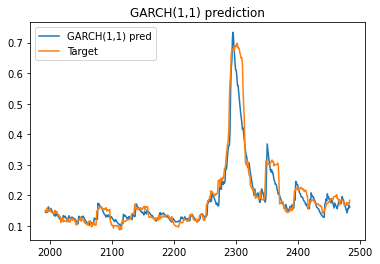

In [39]:
plt.plot(rolling_predictions1, label='GARCH(1,1) pred')
# plt.plot(rolling_predictions2, label='EGARCH(2,3) pred')
# plt.plot(rolling_predictions3, label='GARCH(3,3) pred')
plt.plot(data_cleaned['Target22'][testSize:], label='Target')
plt.title('GARCH(1,1) prediction')
plt.legend()
# plt.savefig("images/garch11.png")
plt.show()

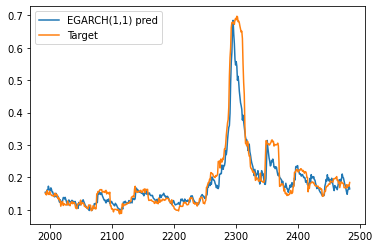

In [42]:
plt.plot(rolling_predictions2, label='EGARCH(1,1) pred')
plt.plot(data_cleaned['Target22'][testSize:], label='Target')
plt.legend()
# plt.savefig("images/garch(1,1).png")
plt.show()

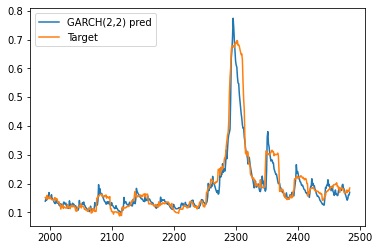

In [43]:
plt.plot(rolling_predictions3, label='GARCH(2,2) pred')
plt.plot(data_cleaned['Target22'][testSize:], label='Target')
plt.legend()
# plt.savefig("images/garch(1,1).png")
plt.show()


This model is EGARCH model which contains another additional value for capturing asymmetric
effects of financial dataset.

In [94]:
# egm_pred = []
# for i in range(testSize):
#     train = logreturns[:-(testSize-i)]*100
#     egm = arch_model(train,p=1,q=1, vol='egarch', dist='skewt')
#     model_fit = egm.fit(disp='off')
#     pred = model_fit.forecast(horizon=1)
#     egm_pred.append(np.sqrt(pred.variance.values[-1,:][0])*0.01*np.sqrt(252))

In [95]:
# egm_rolling_pred = pd.DataFrame(egm_pred, index=logreturns.index[-testSize:])
# plt.plot(egm_rolling_pred, label='pred')
# plt.plot(data_cleaned['Target22'].iloc[testSize:], label='Target')
# plt.legend()
# plt.show()

In [22]:
import metrics as mt

In [44]:
mt.testScore(rolling_predictions1, target)

test Score: 0.0012252930925837498 MSE
test Score: 0.035004186786493835 RMSE
test Score: 0.09765201777154663 MAPE
test Score: 0.9137795297410175 R2 score


In [45]:
mt.testScore(rolling_predictions2, target)

test Score: 0.001792105507596885 MSE
test Score: 0.04233326715004271 RMSE
test Score: 0.10591385343533792 MAPE
test Score: 0.8738945150723971 R2 score


In [46]:
mt.testScore(rolling_predictions3, target)

test Score: 0.0013735669157436796 MSE
test Score: 0.03706166369368326 RMSE
test Score: 0.10330326004441066 MAPE
test Score: 0.9033459128069756 R2 score
